<a href="https://colab.research.google.com/github/Salimgereyevm/SalimgereyevM309/blob/Hometask_6/Hometask_6_MCMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(narr):
    '''Plots 2d lattice with vertices colored in black and red according to given mask.
    Vertice is colored black if narr[i, j] == True and red otherwise.
    
    Parameters
    ----------
    narr : 2d boolean ndarray
        Mask for vertices colors
    '''

    if narr.dtype != 'bool':
        raise ValueError('narr should be a boolean ndarray')
    colors = np.empty(narr.shape, dtype='U5')
    colors[:] = 'red'
    colors[narr] = 'black'
    x, y = np.indices((narr.shape))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()

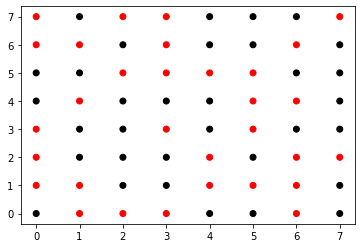

In [60]:
size = 8
narr = np.random.choice([0, 1], size=size**2).reshape((size, size)).astype('bool')
plot_grid(narr)

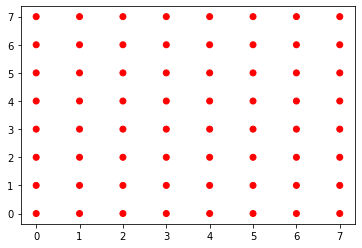

In [61]:
current = np.zeros(size*size).reshape(size,size).astype('bool')
plot_grid(current)

Функция определяющая где уже стоят единички и куда их можно поставить:

In [0]:
def findPlacefor1(chain, current, size):
    for i in range(size):
        for j in range(size):
            if current[i, j] or ((i == 0 or not current[i - 1, j]) and (j == 0 or not current[i, j - 1]) and (i == size - 1 or not current[i + 1, j]) and  (j == size - 1 or not current[i, j + 1])):
                chain.append((i, j))

Начинаем с нулевой матрицы. Будем строить следующий шаг по аналогии с примером про политика: меняем в вакантном, т.е месте определенном на прошлом шаге, значение на противоположное и смотрим количество оставшихся вакантных мест. Если количество вакантных мест в следующем больше, чем в предыдущем - переходим к новой. Если нет, переходим к новой с вероятностью N/M, N - количество мест в новой, M - в старой.

In [0]:
def step(current, size):
    chain = []
    findPlacefor1(chain, current, size)
    ran = chain[np.random.randint(0, len(chain))]
    
    new = np.array(current)
    new[ran[0], ran[1]] = not current[ran[0], ran[1]]
 
    new_chain = []
    findPlacefor1(new_chain, current, size)
 
    if np.random.uniform() > len(chain)/len(new_chain):
        return current
    return new

Теперь по методом Монте-Карло оценим среднее количество единичек:

In [0]:
chains = []
for i in range(100000):
    current = step(current, size)
    chains.append((abs(current)).sum())
E = np.array(chains).mean()

In [65]:
print('E = ', E)

E =  15.20998


Проверим стабильность:

In [66]:
from scipy import stats
def g_test(x, start=0.1, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)


for i in range(10):  
    print(g_test(chains[1000*i:]))

Ttest_indResult(statistic=-4.278366145973067, pvalue=1.8947347968615236e-05)
Ttest_indResult(statistic=-4.54030827340247, pvalue=5.662539529818744e-06)
Ttest_indResult(statistic=-3.2932799759029465, pvalue=0.000992682451516477)
Ttest_indResult(statistic=-1.7123178974268831, pvalue=0.0868601232171687)
Ttest_indResult(statistic=1.5879465047572772, pvalue=0.11232122357822753)
Ttest_indResult(statistic=0.5452971458361923, pvalue=0.5855579985866055)
Ttest_indResult(statistic=-1.8806570438752517, pvalue=0.06004006332845972)
Ttest_indResult(statistic=-1.5293794219317642, pvalue=0.12619425174890414)
Ttest_indResult(statistic=-1.1103172695264723, pvalue=0.26688269272663395)
Ttest_indResult(statistic=-0.095922779386126, pvalue=0.9235833767259094)


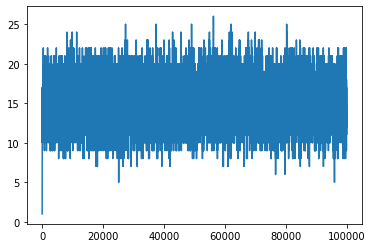

In [67]:
plt.plot(chains)
plt.show()

Нет причин отвергать гипотезу о стабильности. Более того, видно, что 100000 многовато, стабильность проявляется раньше.

Ну и плотность:

<function matplotlib.pyplot.show>

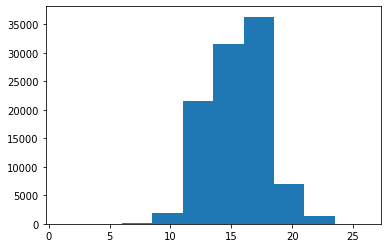

In [68]:
plt.hist(chains)
plt.show